This notebook was created for the study of a galaxy Seyfert Type II.

In [1]:
## Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from astropy import units as u
from astropy import constants as const

In [2]:
## Parameters from Table (similar to Khiali 2016)

M = 2e7 * u.M_sun

In [3]:
## Fixed Constants

Mdot_Edd = 1.45e18 * M * u.M_sun**(-1) *u.g *u.s**(-1)
R_sch = 2.96e5 * M * u.M_sun**(-1) * u.cm
c = 3e10 * u.cm * u.s**(-1)

In [4]:
c = 2.9979e10 # [cm/s]
m_e = 9.1093e-28 # [g]
m_p = 1.6726e-24 # [g]
sigma_T = 6.6524e-25 # [cm2]
e = 4.8032e-10 # [statcoul]

alpha_f = 1/137 # fine structure constant [dim.]
r_0 = 2.8179e-13 # electron classical radius [cm]

In [5]:
# c = (const.c).to('cm s-1')
# m_e = (const.m_e).to('g')
# m_p = (const.m_p).to('g')
# sigma_T = (const.sigma_T).to('cm2')
# e = (const.e).value / (3.33564e-10) * u.statcoulomb

# alpha_f = 1/137 # fine structure constant [dim.]
# r_0 = 2.8179e-13 * u.cm # electron classical radius [cm]

In [6]:
## Functions

## acceleration by reconnection and shock

def tshock(B,E):
    """Implements Eq. (10) of Romero et al. (2010a)"""
    eta = 0.1 # Efficiency of the acceleration [adim]

    return eta*e*c*B/E


## radiative losses (leptonic and hadronic)

def tsyn(B,E,m):
    """Implements Eq. (12) of Romero et al. (2010a)"""
    return (4/3)*((m_e/m)**3)*sigma_T*c*B*B/(m_e*c*c*8*np.pi) * (E/(m*c*c))

def tbre(n,Z,E):
    """Implements Eq. (17) of Romero et al. (2010a)"""

    return 4*n*Z*Z*r_0*r_0*alpha_f*c*(np.log(2*E/(m_e*c*c))-1/3)

def taccrece(E,lacc,B,rho):
    """Implements Eq. (7) of Khiali et al. (2015)"""
    va0 = B/(4*np.pi*rho)**0.5
    Gamma = 1/(2**0.5)
    va = va0*Gamma
    t0 = lacc/va # Alfvén time [s]
    E0 = m_e*c*c # * 6.241509e11 # erg to ev

    return 1.3e5 *  ((m_p/m_e)**(0.5)) * ((E/E0)**(-0.21735284)) * 1/t0

def pp_acc(B,E):
    """Implements Eq. ( ) of """


    return

Defining our source

In [7]:
## Source parameters

erg = 1.602177e-12 # Convert eV to erg

B = 1.9843e+04 # magnetic field [G]
Ee = np.linspace(1e8, 1e14)*erg # Electron energy [erg]
va0 = c # Alfvén Speed [cm/s]
rho = B*B/(va0*va0*4*np.pi) # density [cm^-3]

M = 2e7 # MBH [M⊙]
# P = 3 * 24 * 60 * 60 # Period in [s]
# R_b = P*c # Blob radius [cm]
n = 5.1761e+10 # particle density [cm^-3]

In [8]:
def mag_rec_power(Gamma, r_X, l, l_X, q, mdot, m):
    '''
    Magnetic recconection power released by turbulent fast reconnection in the surrounds of the BH.
    Equivalent to Equation (15) of Kadowaki, de Gouveia Dal Pino & Singh 2015.
    '''
    wdot_B = 1.66e35 * Gamma**(-1/2) * r_X**(-5/8) * l**(-1/4) * l_X * q**(-2) * mdot**(3/4) * m
    return wdot_B

In [9]:
## Estimated Parameters by Murase 2022, Blanco et al. 2023 & Kadowaki et al. 2015

v_A0 = c  # Khiali 2015 page 38

## escala da coroa da zona de reconexão
L = 10 * R_sch  # KGS15 tabela da param
L_X = L # simplificação inicial - depois vemos no espaço paramétrico
# L_X = 5 * R_sch  # KGS15 tabela da param

R_X = 6 * R_sch

mdot = 0.7 # xi

## Parameters

Gamma = 1 / np.sqrt(2)
r_X = R_X / R_sch
l = L / R_sch
l_X = L_X / R_sch
# mdot = Mdot / Mdot_Edd
m = M / u.M_sun

q = ( 1 - ( 3 * R_sch / R_X)**(1/2) )**(1/4) # KGS15 page 4

In [10]:
## KGS15 page 4

# Gamma = (1 + (v_A0 / c )**2 )**(-1/2)
# v_A0 = 9.78e10 * Gamma**(-1/4) * r_X**(-17/16) * l**(3/8) * q * mdot**(3/8)

In [11]:
wdot_B = mag_rec_power(Gamma, r_X, l, l_X, q, mdot, m)

wdot_B # erg s-1

<Quantity 1.02451878e+43 1 / solMass>

In [12]:
B_c = 9.96e8 * r_X**(-1.25) * mdot**(0.5) * m**(-0.5) #G

B_c # G

<Quantity 19842.86134157 solMass(1/2)>

In [13]:
n_c = 8.02e18 * r_X**(-0.375) * Gamma**(0.5) * l**(-0.75) * q**(-2) * mdot**(0.25) * m**(-1) # cm-3

n_c # cm-3

<Quantity 5.1760684e+10 solMass>

In [14]:
T_c = 2.73e9 * Gamma**(1/4) * r_X**(-3/16) * l**(1/8) * q**(-1) * mdot**(1/8) # K

T_c # K

<Quantity 3.10163339e+09>

In [15]:
delta_RX = 11.6 * Gamma**(-5/4) * r_X**(31/16) * l**(-5/8) * l_X * q**(-3) * mdot**(-5/8) * m # cm

delta_RX # cm

<Quantity 8.57198727e+10 1 / solMass>

In [16]:
delt_RX2 = 2.34e4 * Gamma**(-0.31) * r_X**(0.48) * l**(-0.15) * l_X * q**(-0.75) * mdot**(-0.15) * m # cm

delt_RX2 # cm - errado

<Quantity 1.1578316e+13 1 / solMass>

In [17]:
print(f'\nReconnection Power:\n wdot_B = {wdot_B:.4E} erg s-1')
print(f'\nCoronal Magnetic Field:\n B_c = {B_c:.4E} G')
print(f'\nCoronal Particle Number Density:\n n_c = {n_c:.4E} cm-3')
print(f'\nCoronal Temperature:\n T_c = {T_c:.4E} K')
print(f'\nWidth of the current sheet:\n delta_RX = {delta_RX:.4E} cm or delt_RX2 = {delt_RX2:.4E} cm')


Reconnection Power:
 wdot_B = 1.0245E+43 1 / solMass erg s-1

Coronal Magnetic Field:
 B_c = 1.9843E+04 solMass(1/2) G

Coronal Particle Number Density:
 n_c = 5.1761E+10 solMass cm-3

Coronal Temperature:
 T_c = 3.1016E+09 K

Width of the current sheet:
 delta_RX = 8.5720E+10 1 / solMass cm or delt_RX2 = 1.1578E+13 1 / solMass cm


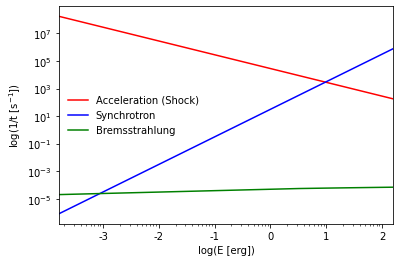

In [18]:
## erg

plt.figure()
# plt.loglog(Ee,taccrece(Ee,R_b,B,rho),label='Acceleration (Reconnection)',color='k')
plt.loglog(Ee,tshock(B,Ee),label='Acceleration (Shock)',color='r')
plt.loglog(Ee,tsyn(Ee,B,m_e),label='Synchrotron',color='blue')
plt.loglog(Ee,tbre(n,1,Ee),label='Bremsstrahlung',color='green')

plt.xlim((Ee.min(),Ee.max()))
plt.legend(frameon=False)
plt.xlabel('log(E [erg])')
plt.ylabel('log(1/t [s$^{-1}$])')
# plt.ylim((1e-4,1e4))
plt.xticks([1e-3,1e-2,1e-1,1e0,1e1,1e2],labels=['-3','-2','-1','0','1','2'])
# plt.savefig('cooling_leptons_erg.png',dpi=300)

plt.show()

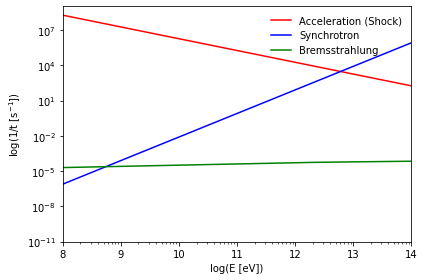

In [19]:
## eV

plt.figure()

# plt.loglog(Ee/erg,taccrece(Ee,R_b,B,rho),'--k',label='Acceleration (Reconnection)')
plt.loglog(Ee/erg,tshock(B,Ee),label='Acceleration (Shock)',color='r')
plt.loglog(Ee/erg,tsyn(Ee,B,m_e),label='Synchrotron',color='blue')
plt.loglog(Ee/erg,tbre(n,1,Ee),label='Bremsstrahlung',color='green')

plt.xlim((Ee.min()/erg,Ee.max()/erg))
plt.legend(frameon=False,loc='upper right')
plt.xlabel('log(E [eV])')
plt.ylabel('log(1/t [s$^{-1}$])')
plt.ylim((1e-11,1e9))
plt.xticks([1e8,1e9,1e10,1e11,1e12,1e13,1e14],labels=['8','9','10','11','12','13','14'])

plt.tight_layout()
# plt.savefig('cooling_leptons_eV.png',dpi=300)

plt.show()